# Klasteryzacja w Python 

## Wstęp 

Algorytmy klastrujące należą do grupy modeli uczenia maszynowego - konkretniej uczenia maszynowego bez nadzoru. Oznacza to, że zmienne nie dzielą się na zmienne objaśniające i zmienną celu. W tym kontekście nie mamy na czym "nadzorować" nauki naszego modelu. W przypadku tego rodzaju modeli naszym celem jest pogrupowanie danych w taki sposób, aby poszczególne skupienia, klastry jak najbardziej różniły się od siebie. Oczywiście podejście do grupowania różni się dla różnych zastosowań jednak ostatecznie chcemy aby poszczególne grupy obserwacji charakteryzowały się czymś innym. 

Poniższy tutorial wprowadzi nas w świat metod klastrujących wychodząc od podstawowych modeli do coraz to trudniejszych. W trakcie nauki zobaczymy w jaki sposób działa każdy z algorytmów oraz na czym polegają główne różnice między nimi. Dzięki takiemu podejściu możliwym jest nabranie intuicji pozwalającej określić kiedy powinniśmy korzystać z jakiego modelu. Ponadto w końcowej fazie zostaną zaprezentowane podstawowe metody badania skuteczności  algorytmów klastrujących. 

## Biblioteki 

In [1]:
# Manpulacja danych i operacje statystyczne
import numpy as np
import pandas as pd

# Przykladowe ramki danych
from sklearn.datasets import make_classification, make_blobs

# Wizualizacja danych
import seaborn as sns
from matplotlib import pyplot as plt

# Inne
import datetime as dt

## Przygotowanie danych 

Do celów dydaktycznych przygotujemy 4 zbiory danych: $X_1$, $X_2$, $X_3$ oraz $X_4$. Każdy z tych zbiorów charakteryzuje się czym innym. Na ich podstawie postaram się pokazać różnice między algorytmami. 

### Losowe dane: $X_1$

In [2]:
# Stworzenie losowego obiektu np.array
X_1, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [3]:
print(f'Typ obiektu: {type(X_1)}')
print(f'Typ danych: {X_1.dtype}')
print(f'Wymiar obiektu array: {X_1.shape}')

Typ obiektu: <class 'numpy.ndarray'>
Typ danych: float64
Wymiar obiektu array: (1000, 2)


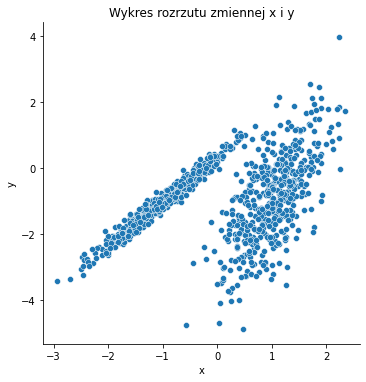

In [4]:
# Wizualizacja
sns.relplot(x=X_1[:, 0], y=X_1[:, 1])
plt.title('Wykres rozrzutu zmiennej x i y')
plt.xlabel('x')
plt.ylabel('y');

### Losowe dane: $X_2$

In [5]:
n_samples = 1500
random_state = 170
X_2, _ = make_blobs(n_samples=n_samples, random_state=random_state)

In [6]:
print(f'Typ obiektu: {type(X_2)}')
print(f'Typ danych: {X_2.dtype}')
print(f'Wymiar obiektu array: {X_2.shape}')

Typ obiektu: <class 'numpy.ndarray'>
Typ danych: float64
Wymiar obiektu array: (1500, 2)


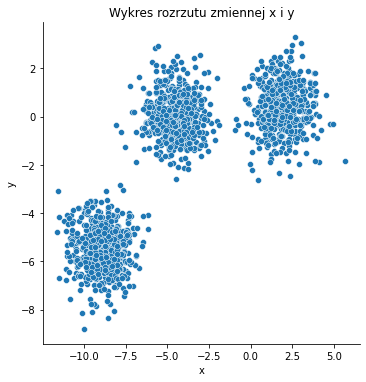

In [7]:
# Wizualizacja
sns.relplot(x=X_2[:, 0], y=X_2[:, 1])
plt.title('Wykres rozrzutu zmiennej x i y')
plt.xlabel('x')
plt.ylabel('y');

### Losowe dane: $X_3$

In [8]:
n_samples = 1000000
random_state = 170
X_3, _ = make_blobs(n_samples=n_samples, random_state=random_state)

In [9]:
print(f'Typ obiektu: {type(X_3)}')
print(f'Typ danych: {X_3.dtype}')
print(f'Wymiar obiektu array: {X_3.shape}')

Typ obiektu: <class 'numpy.ndarray'>
Typ danych: float64
Wymiar obiektu array: (1000000, 2)


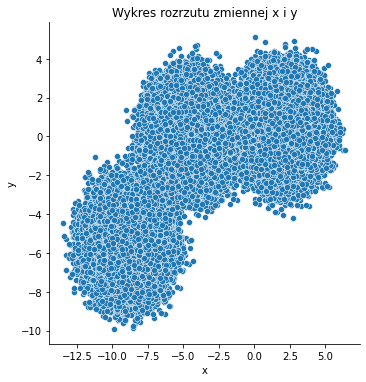

In [10]:
# Wizualizacja
sns.relplot(x=X_3[:, 0], y=X_3[:, 1])
plt.title('Wykres rozrzutu zmiennej x i y')
plt.xlabel('x')
plt.ylabel('y');

### Losowe dane: $X_4$

In [11]:
# Set random state. 
rs = np.random.seed(25)

def generate_circle_sample_data(r, n, sigma):
    """Generate circle data with random Gaussian noise."""
    angles = np.random.uniform(low=0, high=2*np.pi, size=n)

    x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)
    y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

    x = r*np.cos(angles) + x_epsilon
    y = r*np.sin(angles) + y_epsilon
    
    return x, y

def generate_concentric_circles_data(param_list):
    """Generates many circle data with random Gaussian noise."""
    x, y = [], []
    for num, params in enumerate(param_lists):
        x_, y_ = generate_circle_sample_data(*params)

        x = np.concatenate([x, x_])
        y = np.concatenate([y, y_])

    X = np.array([x, y]).transpose() 
    
    return X

In [12]:
# Number of points per circle. 
n = 1000
# Radius. 
r_list =[2, 4, 6]
# Standar deviation (Gaussian noise). 
sigma = 0.2

param_lists = [(r, n, sigma) for r in r_list]

In [13]:
X_4 = generate_concentric_circles_data(param_lists)

In [14]:
print(f'Typ obiektu: {type(X_4)}')
print(f'Typ danych: {X_4.dtype}')
print(f'Wymiar obiektu array: {X_4.shape}')

Typ obiektu: <class 'numpy.ndarray'>
Typ danych: float64
Wymiar obiektu array: (3000, 2)


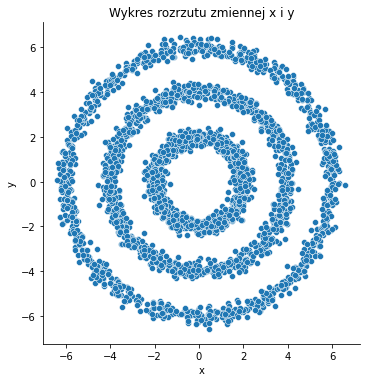

In [15]:
# Wizualizacja
sns.relplot(x=X_4[:, 0], y=X_4[:, 1])
plt.title('Wykres rozrzutu zmiennej x i y')
plt.xlabel('x')
plt.ylabel('y');

### Losowe dane: $X_5$

In [16]:
# Number of points per circle. 
n = 10000
# Radius. 
r_list =[2, 4, 6]
# Standar deviation (Gaussian noise). 
sigma = 0.2

param_lists = [(r, n, sigma) for r in r_list]

In [17]:
X_5 = generate_concentric_circles_data(param_lists)

In [18]:
X_5, _ = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=3, n_classes=1, random_state=4)

In [19]:
print(f'Typ obiektu: {type(X_5)}')
print(f'Typ danych: {X_5.dtype}')
print(f'Wymiar obiektu array: {X_5.shape}')

Typ obiektu: <class 'numpy.ndarray'>
Typ danych: float64
Wymiar obiektu array: (10000, 2)


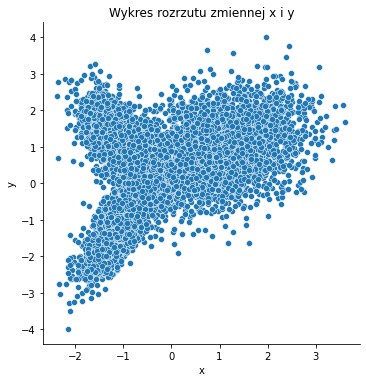

In [20]:
# Wizualizacja
sns.relplot(x=X_5[:, 0], y=X_5[:, 1])
plt.title('Wykres rozrzutu zmiennej x i y')
plt.xlabel('x')
plt.ylabel('y');

# Modele klastrujące

W poniższym tutorialu zaprezentowanych zostanie kilka metod klastrowania, tj.:

- K-Means 
- MiniBatch K-Means 
- Agglomerative Clustering 
- Spectral Clustering 
- DBSCAN 
- BIRCH 

## K-Means

In [21]:
from sklearn.cluster import KMeans

Algorytm _K-Means_ jest jednym z podstawowych modeli uczenia maszynowego wykorzystywanym do klastrowania obserwacji. Jego działanie polega na minimalizacji wariancji wewnątrz klastra. Algorytm wymaga podania liczby klastrów na ile chcemy poidzielić nasze obserwacje. Wybór liczby klastrów zależy od zależności statystycznych w naszych danych jak i również wymagań biznesowych.     

Algorytm _K-Means_ ma za zadanie podzielić $N$ elementową próbę zmiennych losowych $X_{j}$, gdzie $j=1,2,...$ na $K$ rozdzielnych klastrów $C$, gdzie każdy z klastrów jest opisany przez średnią $\mu_{k}$ próbek w klastrze. Wartości średnie $\mu_{k}$ nazywane są _centroidami_ lub _środkami ciężkości_ klastra $K$. Celem algorytmu jest wybór takich _centroidów_, które minimalizują wartość sumy kwadratów w ramach klastra:

$$ \min_{C} \sum_{k=1}^{K} N_{k} \sum_{C(i) = k} (\|x_{i}-\mu_{k}\|^{2}) $$

gdzie $N=\sum_{k=1}^{K} N_{k}$ oraz $C(i)=k$ oznacza przynależność obserwacji $i$ do klastra $k$.

### Czym jest K-Means ++

Algorytm _K-Means++_ jest rozwinięciem algorytmu _K-Means_, które w głównej mierze polega na innej metodzie inicjalizacji _centroidów_. W klasycznej metodzie _K-means_ centroidy w pierwszej iteracji dobierają się losowo - za wyjątkiem inicjalizacji ręcznej. W przypadku _K-means++_ inicjalizacja polega na wybraniu punktów (ogólnie) jak najbardziej oddalonych od siebie. Ostatecznie prowadzi to do lepszych wyników niż losowa inicjalizacja.

### Przykład 1

Aby lepiej zrozumieć zachowanie obu algorytmów warto spojrzeć na poniższą wizualizajcę. W tym przykładzie opieramy się na losowych obserwacjach **X2**, w których gołym okiem widać jak powinny rozłozyć się klastry dla tego zbioru. W pierwszej wizuzlizacji inijcalizujemy centroid przy pomocy estymatora _KMeans_ biblioteki _sklearn_ z inicjalizatorem **random**. W drugim przypadku inicjalizator random zastępujęmy algorytmem **kmeans++**. W obu przypadkach zakładamy jedną iterację algorytmu. Oznacza to, że w obu przypadkach początkowo wybrane centroidy będą tymi ostatecznymi.

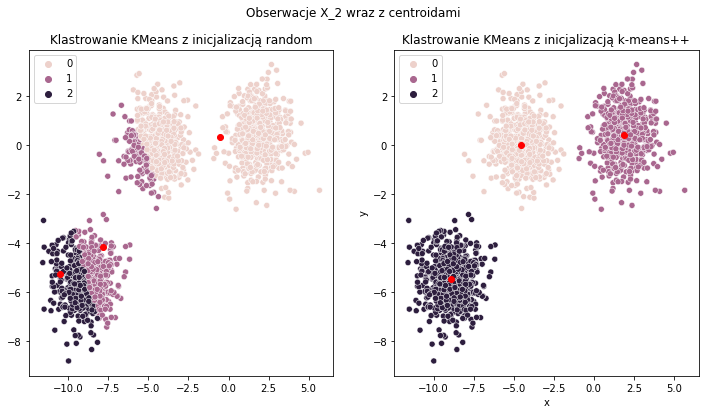

Data frame shape: (1500, 2)
[WARD] Duration: 0:00:00.004992
[AVERAGE] Duration: 0:00:00.000995


In [22]:
# KMeans
np.random.seed(100)
algorithms = ['WARD', 'AVERAGE']
eval_times = []
shape_X = X_2.shape

## Inicjalizacja random
tic = dt.datetime.now()
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_2)
eval_times.append(dt.datetime.now() - tic)

y_cluster_random = model_random.predict(X_2)

## Inicjalizacja k-means++
tic = dt.datetime.now()
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_2)
eval_times.append(dt.datetime.now() - tic)

y_cluster_plusplus = model_plusplus.predict(X_2)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'ro')
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'ro')
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje X_2 wraz z centroidami')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

Tutaj widać przewagę inicjalizatora kmeans++, który już na początku jest w stanie dobrze podzialić nasz zbiór obserwacji na 3 niezależne klastry. W przypadku inicjalizacji random potrzebujemy większej liczby iteracji, aby znaleźć dobrą lokalizacje centroidów. 

<div class="alert alert-block alert-info">
<b>Info</b> 

Zbieżność algorytmu KMeans zależy od liczby iteracji algorytmu. Zazwyczaj przy dużej liczbie iteracji powinniśmy znaleźć globalne minimum naszej funkcji celu. Niestety czasami istnieje ryzyko znalezienia się w lokalnym minimum.

</div>

W tym prostym przypadku, w momencie gdy zwiększymy liczbę iteracji dla inicjalizacji random do 10, to algorytm osiąga przewidywane przez nas wyniki.

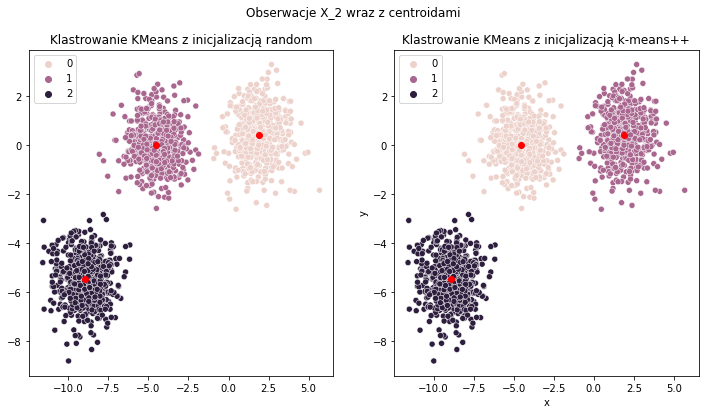

Data frame shape: (1500, 2)
[KMEANS_RANDOM] Duration: 0:00:00.003076
[KMEANS_++] Duration: 0:00:00.000998


In [23]:
# KMeans
np.random.seed(100)
algorithms = ['KMEANS_RANDOM', 'KMEANS_++']
eval_times = []
shape_X = X_2.shape

## Inicjalizacja random
tic = dt.datetime.now()
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=10)
model_random.fit(X_2)
eval_times.append(dt.datetime.now() - tic)

y_cluster_random = model_random.predict(X_2)

## Inicjalizacja k-means++
tic = dt.datetime.now()
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_2)
eval_times.append(dt.datetime.now() - tic)

y_cluster_plusplus = model_plusplus.predict(X_2)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'ro')
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'ro')
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje X_2 wraz z centroidami')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

### Przykład 2 

Poniższy przykład ilustruje zachowanie algorytmu _KMeans_ w nie intuicyjny przez nas sposób. Oczekiwalibyśmy, aby algorytm klastrujący podzielił zbiór  obserwacji na dwa klastry względem widocznych przez nas grup. Niestety tak się nie dzieje i jest to niezależne od liczby iteracji algorytu - poprostu _KMeans_ nie est najlepszy w tego typu problemach.

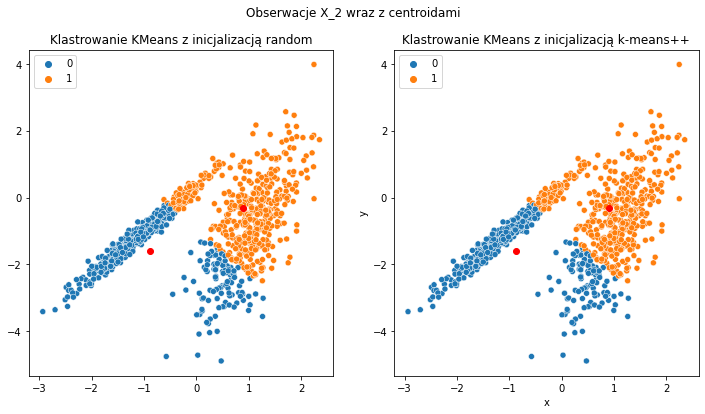

Data frame shape: (1500, 2)
[KMEANS_RANDOM] Duration: 0:00:00.023000
[KMEANS_++] Duration: 0:00:00.017000


In [24]:
# KMeans
np.random.seed(100)
algorithms = ['KMEANS_RANDOM', 'KMEANS_++']
eval_times = []
shape_X = X_2.shape

## Inicjalizacja random
tic = dt.datetime.now()
model_random = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300)
model_random.fit(X_1)
eval_times.append(dt.datetime.now() - tic)

y_cluster_random = model_random.predict(X_1)

## Inicjalizacja k-means++
tic = dt.datetime.now()
model_plusplus = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300)
model_plusplus.fit(X_1)
eval_times.append(dt.datetime.now() - tic)

y_cluster_plusplus = model_plusplus.predict(X_1)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'ro')
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'ro')
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje X_2 wraz z centroidami')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

### Bibliografia [K-Means]
- https://scikit-learn.org/stable/modules/clustering.html#k-means
- https://en.wikipedia.org/wiki/K-means_clustering
- _The Elements of. Statistical Learning: Data Mining, Inference, and Prediction._ Second Edition. February 2009. Trevor Hastie · Robert Tibshirani
- https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

## MiniBatch K-Means

In [25]:
from sklearn.cluster import MiniBatchKMeans

Algorytm _Minibatch KMeans_ jest jednym z wariantów algorytmu _KMeans_ szczególnie użytecznym w przypadku bardzo dużych zbiorów danych - w przypadkach, gdy czas ewaluacji algorytmu liczy się bardziej niż jego dokładność. **MiniBatch** to podzbiór danych wejściowych, losowo próbkowany w każdej iteracji podczas treningu modelu. W efekcie podział zbioru treningowego na mini-batche redukuję czas kalkulacji potrzebny do osiągnięcia zbieżności algorytmu. Ostatecznie algorytm oparty o mini-batche w ogólności osiąga tylko nieco gorsze wyniki niż klasyczna metoda _Kmeans_.

### Przykład

Zastosowanie algorytmu _MiniBatch K-Means_ w przypadku jasno widocznych klastrów, jednak gdy obserwacji mamy więcej działa tak samo daję takie same wyniki jak algorytm _Kmeans_. Jednak w tym przypadku zależy nam na sprawdzeniu czasu przetwarzania - to tutaj powinna być widoczna różnica. Tak też się dzieje. Widoczny czas przetwarzania jasno wskazuje na przewagę algorytmu _MiniBatch K-Means_ w przypadku dużych próbek. Czas przetwarzania w tym przypadku jest kilka razy szybszy przy zachowaniu niemal takiego samego podziału na klastry.  

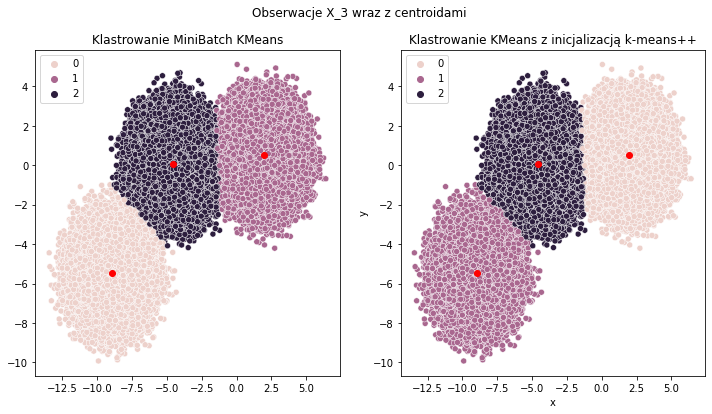

Data frame shape: (1000000, 2)
[KMEANS_++] Duration: 0:00:04.884010
[MINIBATCH_KMEANS] Duration: 0:00:01.233012


In [26]:
np.random.seed(100)
algorithms = ['KMEANS_++', 'MINIBATCH_KMEANS']
eval_times = []
shape_X = X_3.shape

# KMeans
tic = dt.datetime.now()
model_random = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=1000)
model_random.fit(X_3)
eval_times.append(dt.datetime.now() - tic)

y_cluster_random = model_random.predict(X_3)

#  Minibatch K-means
tic = dt.datetime.now()
model_minibatch = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=1000, batch_size=100)
model_minibatch.fit(X_3)
eval_times.append(dt.datetime.now() - tic)

y_cluster_minibatch = model_minibatch.predict(X_3)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_3[:, 0], y=X_3[:, 1], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_3[:, 0], y=X_3[:, 1], hue=y_cluster_minibatch, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'ro')
ax[0].set_title('Klastrowanie MiniBatch KMeans')
ax[1].plot(model_minibatch.cluster_centers_[:, 0], model_minibatch.cluster_centers_[:, 1], 'ro')
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje X_3 wraz z centroidami')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

<div class="alert alert-block alert-success">
<b>Zadanie</b> 

Korzystając z kodu dostępnego przy powyższych wizualizacjach znajdź współrzędne _centroidów_ dla algorytmu KMeans oraz _MiniBatchKMeans_. Czy w tym przypadku jest jakaś różnica ? Policz odległość Euklidesową między nimi. 
    
_Podpowiedź_: Najpierw znajdź punkty, które są najbliżej siebie. Może się zdarzyć, że oznaczenie klastrów 0, 1, 2 będzie różne dla różnych algorytmów.
</div>

### Bibliografia [Minibatch K-Means]
- https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans

## Agglomerative Clustering

In [27]:
from sklearn.cluster import AgglomerativeClustering

Klastrowanie hierarchiczne polega na budowaniu zagnieżdżonych klastrów poprzez ich kolejne scalanie lub dzielenie. Hierarchia klastrów jest reprezentowana jako drzewo (lub dendrogram). Korzeń drzewa jest unikalnym skupiskiem, które gromadzi wszystkie próbki, a liście są skupiskami z tylko jedną próbką. Obiekt ```AgglomerativeClustering``` wykonuje hierarchiczne grupowanie przy użyciu podejścia oddolnego: każda obserwacja rozpoczyna się we własnym klastrze, a klastry są sukcesywnie łączone ze sobą. Kryteria powiązania ```linkage``` określają metrykę używaną w strategii łączenia: 

- **Ward** - minimalizuje sumę kwadratów różnic we wszystkich klastrach. Jest to podejście minimalizujące wariancje i w tym sensie jest podobne do funkcji celu k-średnich, ale rozwiązywane za pomocą aglomeracyjnego podejścia hierarchicznego. 
- **Maximum linkage**/**Complete linkage** - minimalizuje maksymalną odległość między obserwacjami par klastrów. 
- **Average linkage** - minimalizuje średnią odległości między wszystkimi obserwacjami par klastrów. 
- **Single linkage** - minimalizuje odległość pomiędzy najbliższymi obserwacjami par klastrów. 


### Przykład 1

Metody aglomeracyjne w przypadku klastrów o jasno widocznym środku ciężkości klastra radzą sobie bardzo dobrze. Obie metody _Ward_ oraz _Average_ bardzo dobrze dzielą obserwacje na klastry. Podział jest taki sam jak w przypadku algorytmów z rodziny _KMeans_.

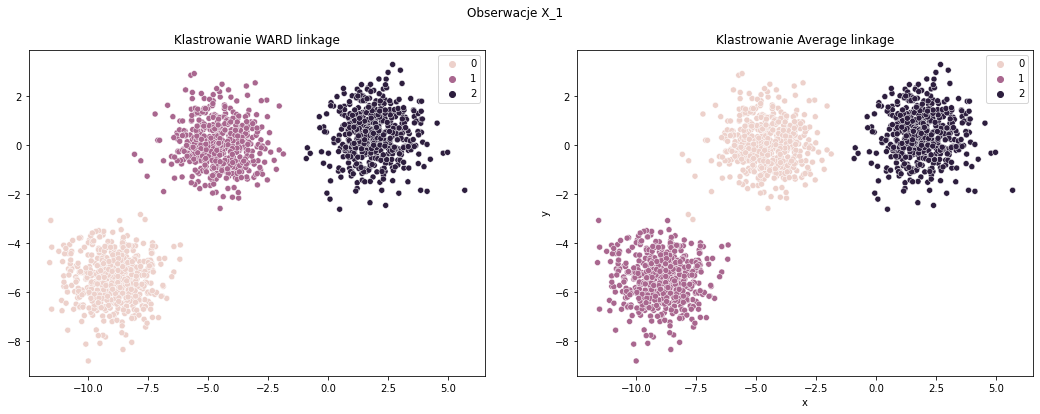

Data frame shape: (1500, 2)
[WARD] Duration: 0:00:00.047997
[AVERAGE] Duration: 0:00:00.027001


In [28]:
np.random.seed(100)
algorithms = ['WARD', 'AVERAGE']
eval_times = []
shape_X = X_2.shape

# Algorytm Ward
tic = dt.datetime.now()
model_ward = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
model_ward.fit(X_2)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_ward = model_ward.labels_

# Algorytm Average
tic = dt.datetime.now()
model_avg = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean')
model_avg.fit(X_2)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_avg = model_avg.labels_

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y_cluster_ward, ax=ax[0])
sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y_cluster_avg, ax=ax[1])
ax[0].set_title('Klastrowanie WARD linkage')
ax[1].set_title('Klastrowanie Average linkage')
plt.suptitle('Obserwacje X_1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

### Przykład 2

Drugi przykład jest nieco trudniejszy. Klastry są widoczne ale są różnych kształtów. W tym przypadku oba algorytmy sobie nie radzą. Metoda _Ward_ dzieli klastry podobnie jak algorytm _KMeans_. W przypadku metody opartej o powiązanie _Average_ dostajemy dwa klastry z czego jeden z nich składa się z jednej obserwacji - raczej nie tego oczekujemy po algorytmie klastrującym.

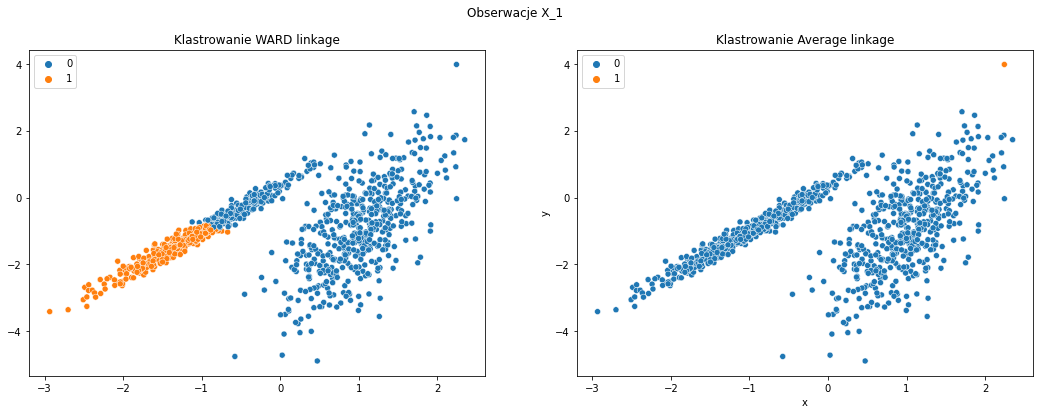

Data frame shape: (1000, 2)
[WARD] Duration: 0:00:00.013999
[AVERAGE] Duration: 0:00:00.012001


In [29]:
np.random.seed(100)
algorithms = ['WARD', 'AVERAGE']
eval_times = []
shape_X = X_1.shape

# Algorytm Ward
tic = dt.datetime.now()
model_ward = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
model_ward.fit(X_1)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_ward = model_ward.labels_

# Algorytm Average
tic = dt.datetime.now()
model_avg = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='euclidean')
model_avg.fit(X_1)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_avg = model_avg.labels_

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_ward, ax=ax[0])
sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_avg, ax=ax[1])
ax[0].set_title('Klastrowanie WARD linkage')
ax[1].set_title('Klastrowanie Average linkage')
plt.suptitle('Obserwacje X_1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

<div class="alert alert-block alert-success">
<b>Zadanie</b> 

Spróbuj analogicznie jak powyżej zastosować algorytmy _Single Linkage_ oraz _Maximum Linkage_.
</div>

### Bibliografia [Agglomerative Clustering]
- https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
- https://en.wikipedia.org/wiki/Hierarchical_clustering

## Spectral Clustering

In [30]:
from sklearn.cluster import SpectralClustering

W praktyce _Spectral Clustering_ jest bardzo przydatne, gdy struktura poszczególnych klastrów jest wysoce niewypukła lub bardziej ogólnie, gdy miara środka i rozproszenia klastra nie jest odpowiednim opisem całego klastra, na przykład gdy klastry są zagnieżdżonymi okręgami na płaszczyźnie 2D. Cała teoria związana z klastrowaniem spektralnym wywodzi się z teorii grafów oraz algebry liniowej. Algorytm składa się na wejściu  danych w postaci macierzy podobieństwa _adjacency matrix_, a następnie wyznacza się macierz Laplace'a. Kolejnym etapem jest wyliczenie wektorów i wartosci własnych macierzy Laplace'a. Ostatecznie na wyznaczonych wektorach własnych uruchamiany algorytm _k-means_. 

Aby wyliczyć macierz _adjacency matrix_ możemy wykorzystać metody: skorzystać z algorytmu _k nearest neighbors_ lub skorzystać z kalkulacji przy pomocy jądra _rbf_. W pierwszym przypadku do wyliczenia maceirz wykorzystujemy teorię grafów oraz algorytm _k nearest neighbor_ znajdujący k najbliższych sąsiadów. W drugim przypadku wykorzystujemy jądro RBF, które (Radial basis function) na dwóch próbkach $x_{1}$ i $x_{2}$, reprezentowanych jako wektory cech w pewnej przestrzeni wejściowej, jest zdefiniowane jako: 

$$ K(x_{1}, x_{2}) = \exp(-\gamma(\| x_{1} - x_{2}\|^{2})) $$

gdzie parameter $\gamma$ jest parametrem modelu. Czasami możemy się spotkać z zapisem gdzie $\gamma = \frac{1}{2\sigma^{2}}$. Wynika to z tego, że jądro RBF jest pewnym "uogólnieniem" jądra Gaussowskiego. W dużym uproszczeniu oznacza to, że przy wywołaniu metody ```fit``` liczymy macierz _adjacency matrix_ przy pomocy jądra RBF. A następnie dokonywana są kolejne kalkulacje tj. kalkulacja macierzy Laplace'a oraz wyznaczenie wektorów i wartości własnych. 

### Przykład

W poniższym przykładzie dużo lepszym wyborem jest algorytm _SpectralClustering_ wraz z metodą wyznaczenia macierzy podobieństwa ```affinity``` ustawioną jako _rbf_. Przy dobrze dobranych hiperparametrach jesteśmy w stanie skutecznie odseparować od siebie obie grupy obserwacji. W moim odczuciu dobranie lepszych wartości parametrów dla metody _knn_ jest trudniejsze. Ponadto wydaje się, że algorytm oparty o _rbf_ działa nieco szybciej.

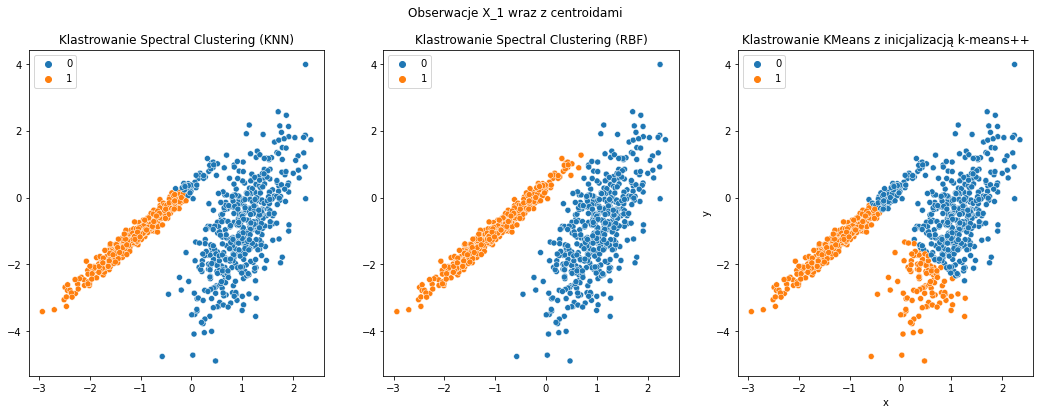

Data frame shape: (1000, 2)
[SPECTRAL_KNN] Duration: 0:00:01.023467
[SPECTRAL_RBF] Duration: 0:00:00.605106
[KMEANS] Duration: 0:00:00.013992


In [31]:
np.random.seed(100)
algorithms = ['SPECTRAL_KNN', 'SPECTRAL_RBF', 'KMEANS']
eval_times = []
shape_X = X_1.shape

# Spectral Clustering (KNN)
tic = dt.datetime.now()
model_sc = SpectralClustering(n_clusters=2, n_neighbors=10, affinity='nearest_neighbors',  assign_labels='kmeans')
model_sc.fit(X_1)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_spectral_knn = model_sc.labels_

# Spectral Clustering (RBF)
tic = dt.datetime.now()
model_sc = SpectralClustering(n_clusters=2, gamma=10.0, affinity='rbf', assign_labels='kmeans')
model_sc.fit(X_1)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_spectral_rbf = model_sc.labels_

# K-means++
tic = dt.datetime.now()
model_plusplus = KMeans(n_clusters=2, init='k-means++')
model_plusplus.fit(X_1)
eval_times.append(dt.datetime.now() - tic)

y_cluster_plusplus = model_plusplus.predict(X_1)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_spectral_knn, ax=ax[0])
sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_spectral_rbf, ax=ax[1])
sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_plusplus, ax=ax[2])
ax[0].set_title('Klastrowanie Spectral Clustering (KNN)')
ax[1].set_title('Klastrowanie Spectral Clustering (RBF)')
ax[2].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje X_1 wraz z centroidami')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

<div class="alert alert-block alert-success">
<b>Zadanie</b> 

Sprawdź co się stanie gdy zmienisz wartość parametru ```gamma```.
</div>

### Bibliografia [Spectral Clustering]
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#r5f6cbeb1558e-2
- https://towardsdatascience.com/spectral-clustering-aba2640c0d5b
- https://en.wikipedia.org/wiki/Radial_basis_function_kernel

## DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

Algorytm _DBSCAN_ w dużym uproszczeniu polega na interpretacji klastrów jako pół o wysokiej gęstości odseparowanych polami o niskiej gęstości. To powoduję, że klastry znaleznione przy pomocy alorytmu _DBSCAN_ mogą mieć dowolny kształt w stosunku do klastrów powstałych przy pomocy algorytmu _KMeans_, który zakłada wypukłość klastrów. Główną składową algorytmu jest pojęcie _próbki podstawowej_, która jest próbką znajdującą się w obszarze wysokiej gęstości. Wtedy klaster jest zbiorem próbek podstawowych, dla których każda jest blisko kolejnej próbki (odległość liczona za pomocą przyjętej metryki odległości) oraz zbioru próbek niepodstawowych, które są blisko próbki podstawowej, ale nie są próbką podstawową. Algorytm opiera się na dwóch podstawowych parametrach: ```min_samples``` oraz ```eps```, które formalnie definiują co użytkownik ma na myśli mówiąc o gęstości. Wysoka wartość ```min_samples``` oraz niska wartość ```eps``` oznacza potrzebę uzyskania wyższej gęstości obserwacji potrzebną do uformowania się klastra. Dokładniej, definujemy _próbkę podstawową_ jako podzbiór obserwacji dla którego istnieje ```min_samples``` innych podzbiorów w odległości ```eps```, które są "sąsiadami" _próbki podstawowej_. Oznacza to, że _próbka podstawowa_ znajduje się w gęstym obszarze przestrzeni wektorowej.

### Przykład 1

Pierwszy przykład obejmuje klastrowanie zbioru $X_1$. Poniżej porówanjmy zachowanie trzech algorytmów: DBSCAN, Spectral Clustering oraz KMeans. Warto zwrócić uwagę na jedną rzecz w przypadku algorytmu _DBSCAN_. Przy definiowaniu parametrów modelu nie zajdziemy parametru ```n_clusters``` tak jak w przypadku poprzednich. Jest to bardzo duży atut tego aglorytmu, ponieważ on sam dzieli nasz zbiór na odpowiednią liczbę klastrów w zależności jak zdefiniujemy gęstość za pomocą parametrów ```min_samples``` oraz ```eps```.

Przy zadanych parametrach wydaję się, że algorytm _Spectral Clustering_ działa najlepiej. Jednak jak przyjrzymy się bliżej to może się wydawać, że algorytm _DBSCAN_ dzieli obserwacje na 3 klastry. Nic bardziej mylnego. Labelka "-1" oznacza, że daną obsewację nie udało się zaliczyć do żadnego klastra - przynajmniej w przypadku tak określonych parametrów ```min_sample``` oraz ```eps```. Zatem obserwacje z labelką "-1" można określić jako anomalie w danym zbiorze obserwacji. Właśnie wykrywanie anomalii jest kolejnym zastosowaniem algorytmu _DBSCAN_ oprócz klastrowania. W powyższym przykładzie zapewne uda się podzielić zbiór przy pomocy _DBSCAN_ jeszcze lepiej (zmieniając parametry), ponieważ wydaję się że niektóre z obserwacji mogą jednak nie być anomaliami.

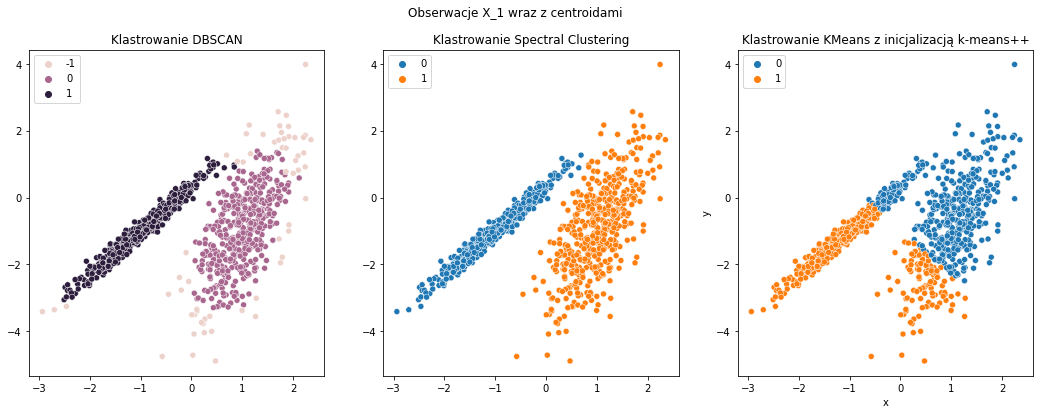

Data frame shape: (1000, 2)
[DBSCAN] Duration: 0:00:00.292658
[SPECTRAL] Duration: 0:00:00.097611
[KMEANS++] Duration: 0:00:00.013999


In [33]:
np.random.seed(100)
algorithms = ['DBSCAN', 'SPECTRAL', 'KMEANS++']
eval_times = []
shape_X = X_1.shape

# Algorytm DBSCAN
tic = dt.datetime.now()
model_dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
model_dbscan.fit(X_1)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_dbscan = model_dbscan.labels_

# Spectral clustering
tic = dt.datetime.now()
model_sc = SpectralClustering(n_clusters=2, gamma=10.0)
model_sc.fit(X_1)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_sc = model_sc.labels_

# K-means++
tic = dt.datetime.now()
model_plusplus = KMeans(n_clusters=2, init='k-means++')
model_plusplus.fit(X_1)
eval_times.append(dt.datetime.now() - tic)

y_cluster_plusplus = model_plusplus.predict(X_1)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_dbscan, ax=ax[0])
sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_sc, ax=ax[1])
sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_plusplus, ax=ax[2])
ax[0].set_title('Klastrowanie DBSCAN')
ax[1].set_title('Klastrowanie Spectral Clustering')
ax[2].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje X_1 wraz z centroidami')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

<div class="alert alert-block alert-success">
<b>Zadanie</b> 

Spróbuj nieco zmienić hiperparametry ```min_samples``` oraz ```eps```. Czy uda ci się lepiej podzielić obserwacje na klastry ?
</div>

### Przykład 2

Tym razem na warsztat weźmy zbiór danych $X_4$, który składa się z trzech okręgów o różnej średnicy. Zobaczmy jak w tym przypadku zadziała algorytm _DBSCAN_ na tle innych. 

Jak widać z powyższymi parametrami model _DBSCAN_ znajduję klastry w taki sam sposób jak model _Spectral Clustering_. Jednakże bardzo duża różnica tkwi w czasie przeliczeń. W przypadku _DBSCAN_ klastrowanie następuje ponad 1000 razy szybciej - przynajmniej w tym konkretnym przypadku. Wynika to ze złożoności obliczeń w algorytmie _Spectral Clustering_. Jeśli chodzi o _KMeans_ to podobnie jak było to w _Przykład 1_ klastry są dobierane zgodnie z założeniem wypukłości klastrów, co w tym przypadku nie jest oczekiwane.

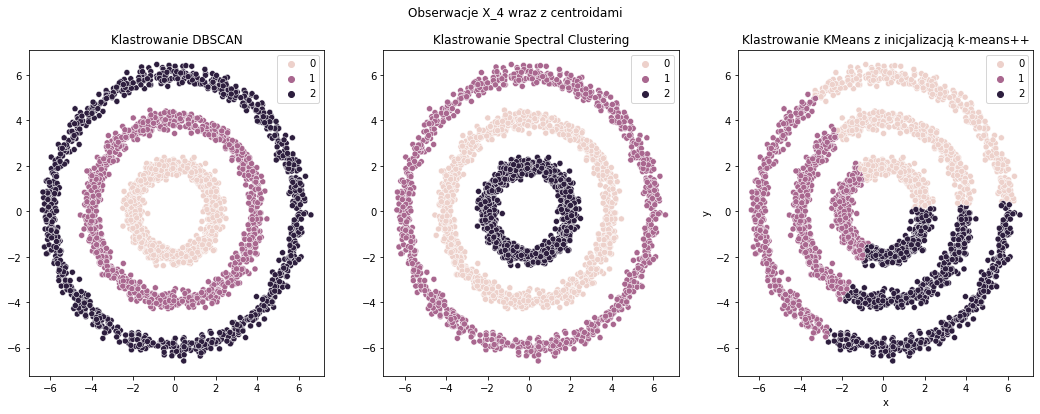

Data frame shape: (3000, 2)
[DBSCAN] Duration: 0:00:00.014990
[SPECTRAL] Duration: 0:00:05.775587
[KMEANS++] Duration: 0:00:00.048000


In [34]:
np.random.seed(100)
algorithms = ['DBSCAN', 'SPECTRAL', 'KMEANS++']
eval_times = []
shape_X = X_4.shape

# Algorytm DBSCAN
np.random.seed(100)
tic = dt.datetime.now()
model_dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
model_dbscan.fit(X_4)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_dbscan = model_dbscan.labels_

# Algorytm Spectral clustering
tic = dt.datetime.now()
model_sc = SpectralClustering(n_clusters=3, gamma=10.0)
model_sc.fit(X_4)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_sc = model_sc.labels_

# Algorytm K-means++
tic = dt.datetime.now()
model_plusplus = KMeans(n_clusters=3, init='k-means++')
model_plusplus.fit(X_4)
eval_times.append(dt.datetime.now() - tic)

y_cluster_plusplus = model_plusplus.predict(X_4)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.scatterplot(x=X_4[:, 0], y=X_4[:, 1], hue=y_cluster_dbscan, ax=ax[0])
sns.scatterplot(x=X_4[:, 0], y=X_4[:, 1], hue=y_cluster_sc, ax=ax[1])
sns.scatterplot(x=X_4[:, 0], y=X_4[:, 1], hue=y_cluster_plusplus, ax=ax[2])
ax[0].set_title('Klastrowanie DBSCAN')
ax[1].set_title('Klastrowanie Spectral Clustering')
ax[2].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje X_4 wraz z centroidami')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

### Bibliografia [DBSCAN]
- https://scikit-learn.org/stable/modules/clustering.html#dbscan
- https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556
- https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

## BIRCH

In [35]:
from sklearn.cluster import Birch

Algorytm _Balanced Iterative Reducing and Clustering using Hierarchies_ w skrócie **BIRCH** buduje drzewo o nazwie _Clustering Feature Tree_ (CFT) dla podanych danych, które są kompresowane stratnie do zestawu węzłów _Clustering Feature Nodes_ (Nodes CF). Węzły CF mają pewną liczbę podklastrów zwanych _Clustering Feature Subclasters_ (CFS). Podklastry CF przechowują informacje niezbędne do grupowania, co zapobiega konieczności przechowywania wszystkich danych wejściowych w pamięci. Informacje te obejmują:  

- _Number of Samples_ - liczbę próbek w podgrupie,
- _Linear Sum_ - sumę liniową, która jest n-wymiarowem wektorm przechowującym sumę wszystkich próbek,
- _Squared Sum_ - suma kwadratów normy L2 dla wszystkich próbek,
- _Centroids_ - centroidy równe _Linear Sum_ / _Number of Samples_,
- Norma kwadratowa centroidów.

W dużym uproszczeniu algorytm **BIRCH** zajmuje się dużymi zestawami danych, najpierw generując bardziej zwarte podsumowanie, które zachowuje jak najwięcej informacji o rozkładzie, a następnie grupując podsumowanie danych zamiast oryginalnego zestawu obserwacji. Więcej informacji znajdziecie pod linkami w bibliografii.

### Przykład 1

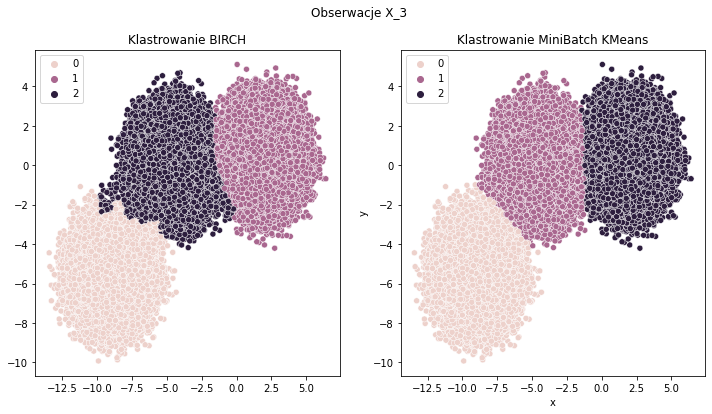

Data frame shape: (1000000, 2)
[BIRCH] Duration: 0:00:23.614134
[MINIBATCH_KMEANS] Duration: 0:00:00.626000


In [36]:
np.random.seed(100)
algorithms = ['BIRCH', 'MINIBATCH_KMEANS']
eval_times = []
shape_X = X_3.shape


# BIRCH
tic = dt.datetime.now()
model_brc = Birch(n_clusters=3, threshold=0.5, branching_factor=50)
model_brc.fit(X_3)
eval_times.append(dt.datetime.now() - tic)

y_cluster_birch = model_brc.labels_

#  Minibatch K-means
tic = dt.datetime.now()
model_minibatch = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=1000, batch_size=100)
model_minibatch.fit(X_3)
eval_times.append(dt.datetime.now() - tic)

y_cluster_minibatch = model_minibatch.predict(X_3)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sns.scatterplot(x=X_3[:, 0], y=X_3[:, 1], hue=y_cluster_birch, ax=ax[0])
sns.scatterplot(x=X_3[:, 0], y=X_3[:, 1], hue=y_cluster_minibatch, ax=ax[1])
ax[0].set_title('Klastrowanie BIRCH')
ax[1].set_title('Klastrowanie MiniBatch KMeans')
plt.suptitle('Obserwacje X_3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

### Przykład 2

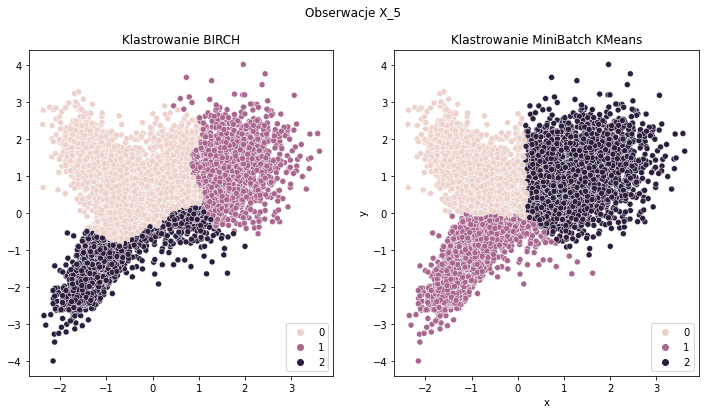

Data frame shape: (10000, 2)
[BIRCH] Duration: 0:00:00.124001
[MINIBATCH_KMEANS] Duration: 0:00:00.033000


In [37]:
np.random.seed(100)
algorithms = ['BIRCH', 'MINIBATCH_KMEANS']
eval_times = []
shape_X = X_5.shape


# BIRCH
tic = dt.datetime.now()
model_brc = Birch(n_clusters=3, threshold=0.5, branching_factor=50)
model_brc.fit(X_5)
eval_times.append(dt.datetime.now() - tic)

y_cluster_birch = model_brc.labels_

#  Minibatch K-means
tic = dt.datetime.now()
model_minibatch = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=1000, batch_size=100)
model_minibatch.fit(X_5)
eval_times.append(dt.datetime.now() - tic)

y_cluster_minibatch = model_minibatch.predict(X_5)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sns.scatterplot(x=X_5[:, 0], y=X_5[:, 1], hue=y_cluster_birch, ax=ax[0])
sns.scatterplot(x=X_5[:, 0], y=X_5[:, 1], hue=y_cluster_minibatch, ax=ax[1])
ax[0].set_title('Klastrowanie BIRCH')
ax[1].set_title('Klastrowanie MiniBatch KMeans')
plt.suptitle('Obserwacje X_5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cza kalkulacji
print(f'Data frame shape: {shape_X}')
for algorithm, etime  in zip(algorithms, eval_times):
    print(f'[{algorithm}] Duration: {etime}')

### Bibliografia [BIRCH]
- https://scikit-learn.org/stable/modules/clustering.html#mean-shift
- https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9

# Analiza skuteczności 

Badanie skuteczności algorytmów klastrujących nie jest łatwe. W zależności od problemu biznesowego oczekujemy zupełnie innych wyników. Dodatkowo w przypadku danych wielowymiarowych, gdzie wykorzystujemy do klastrowania więcej niż dwie, trzy zmienne pojawiają się dodatkowo problemy z wizualizacją wyników. W tym przypadku mogą się przydać algorytmy z rodziny redukcji wymiarowości tj. PCA, ICA czy TSNE. Nadal jednak potrzebujemy odpowiedzieć sobie na pytanie czy dany podział na klastry jest prawidłowy ? W końcu nie będziemy dokonywać decyzji biznesowych  wyłącznie na podstawie wizualizacji wyników - do tego potrzebujemy odpowiednich metryk. Dodatkowo w przypadku automatyzacji naszego procesu nie będzie czasu na to, aby przy każdym przeliczeniu sprawdzać wizualne wyniki, ale będziemy chcieli podejmować decyzje na podstawie wybranej, bądź wybranych metryk aby ostatecznie nasz proces był w pełni zautomatyzowany. 

W poniższej części zostanie wprowadzonych kilka podstawowych miar, które mogą pomóc nam w zadaniu analizy skuteczności klastrowania.

## Silhouette Coefficient 

In [38]:
from sklearn.metrics import silhouette_score

Jedną z najpopularniejszych metod do oceny jakości klastrowania jest metryka _Silhouette Coefficient_. Jej wysoką wartość interpretujemy jako bardzo dobrze wykonane klastrowanie. Metryka zdefiniowana jest dla każdej obserwacji z osobna w następujący sposób:

$$ s = \frac{b-a}{\max(a, b)}$$

gdzie:
- a: średnia odległość pomiędzy obserwacją oraz resztą obserwacji z tego samego klastra
- b: średnia odległość pomiędzy obserwacją oraz innymi obserwacjami z kolejnego **najbliższego** klastra

Metryka _Silhouette coefficient_ dla zbioru obserwacji jest średnią z wartości $s$ dla każdej obserwacji z osobna. 


**Warto zapamiętać**
- metryka osiąga wyniki z przedziału [-1, 1], gdzie -1 oznacza zupełnie błędne dopasowanie, a 1 bardzo dobrze podzielone zbiory. W przypadku wartości 0 nie jesteśmy nic w stanie stwierdzić apropo podziału zbioru danych na grupy
- wynik jest wyższy, gdy klastry są gęste i dobrze odseparowane od siebie (Przykład 1)
- wynik jest wyższy w przypadku klastrów wypukłych (Przykład 1), niż dla innych rodzajów klastrów np. takich opartych na gęstości jak DBSCAN (Przykład 2)

## Caliński-Harabasz Index

In [39]:
from sklearn.metrics import calinski_harabasz_score

Kolejną metryką przydatną w trakcie klastrowania jest mniej popularna metryka _Calinski-Harabasz_, inaczej zwana _Variance Ratio Criterion_. Została ona zaproponowana przez Polskich naukowców Calińskiego i Harabasza w 1972 roku.  Podobnie jak w przypadku poprzedniej metryki wyższa wartość oznacza lepsze grupowanie danych w klastry. Metrykę _Variance Ratio Criterion_ dla zbioru danych $E$ o liczbie obserwacji $n$ oraz liczbie klastrów $k$ definiujemy w następujacy sposób:

$$ s = \frac{tr(B_{k})}{tr(W_{k})} x \frac{n - k}{k-1}$$

gdzie $tr(B_{k})$ oraz $tr(W_{k})$ jest śladem macierzy $B_{k}$ oraz $W_{k}$. Dla przypomnienia ślad macierzy $A$ definiujemy jako:

$$ tr(A) = \sum_{i=1}^{n} a_{ii} = a_{11}+a_{22}+a_{33}+...$$

czyli jest to suma wartości na przekątnej macierzy kwdaratowej. Macierze $B_{k}$ oraz $W_{k}$ są wyliczane dla każdego klastra z osobna i mają następująco postać:

$$ W_{k} = \sum_{q=1}^{k}\sum_{x \in C_{q}}(x-c_{q})(x-c_{q})^{T} $$
$$ B_{k} = \sum_{q=1}^{k}n_{q}(c_{q}-c_{E})(c_{q}-c_{E})^{T} $$

gdzie $C_{q}$ jest zbiorem obserwacji klastra $q$, $c_{q}$ jest środkiem klastra $q$, $c_{E}$ jest środkiem całego zbioru obserwacj $E$ oraz $n_{q}$ jest liczbą obserwacji w klastrze $q$.

**Warto zapamiętać**
- wartość metryki jest wyższa, gdy klastry są gęste oraz dobrze rozdzielone od siebie
- metryka jest szybka do kalkulacji

##  Davies-Bouldin Index 

In [40]:
from sklearn.metrics import davies_bouldin_score

Ostatnim z analizowanych metryk skuteczności klastrowania jest _Davies-Bouldin Index_. Metryka mierzy średnie "podobieństwo" między klastrami. Wtedy wartość równa zero jest najniższą osiągana wartością, natomiast 1 najwyższa. Jak nie trudno się domyślić chcemy aby klastry był jak najmniej do siebie podobne stąd interesuje nas jak najniższa wartość tej metryki. 

_Davies-Bouldin Index_ definiujemy jako średnie podobieństwo między klastrami $C_{i}$ dla $i=1, 2, ..., k$ oraz najbardziej podobnym klastrem $C_{j}$. Podobieństwo jest definiowane za pomocą wartości $R_{ij}$ oraz wzoru:

$$ R_{ij} = \frac{s_{i} + s_{j}}{d_{ij}}$$

gdzie:
- $s_{i}$ jest średnią odległością pomiędzy każdą z obserwacji klastra $i$ oraz centroidu tego klastra
- $d_{ij}$ jest odległością pomiędzy centroidami klastrów $i$ oraz $j$

Wtedy _Davies-Bouldin Index_ ma następującą postać:

$$ DB = \frac{1}{k} \sum_{i=1}^{k}\max_{i \neq j} R_{ij}$$

**Warto zapamiętać**
- kalkulacja tej metryki _Davies-Bouldin index_ jest prostsza niż _Silhouette coefficient_
- podobnie jak poprzednie metody _Davies-Bouldin index_ osiąga lepsze wyniki dla klastrów wypukłych, lepiej odseparowanych od siebie niż dla metod opartych o gęstość jak DBSCAN.

## Dunn Index

...

# Przykłady (analiza skuteczności)

## Przykład 1

Poniżej widoczne są 3 rodzaje klastrowania. Wizualizacja 1 jest wynikiem klastrowania KMeans z inicjalizacją random dla trzech klastrów. Dodatkowo w tym przypadku stosujemy tylko jedną iteracje algorytmu aby wynik był niezadawalający. Kolejne wizualizacja jest wynikiem algorytmu KMeans++ z trzema klastrami, zaś ostatnia to wynik KMeans++ z czterama klastrami. Gołym okiem widać, że drugi rodzaj klastrowania jest najlepszy. Jak wyglądają wyniki względem metryki _Silhouette coeffcient_ ? Wartość najwyższa jest osiągana dla drugiego algorytmu - tak jak się spodziewaliśmy. Dużo niższe wyniki są dla algorytmu pierwszego i trzeciego. To pokazuję na siłę tej metryki, która oprócz informacji jaki algorytm wybrać (KMeans z inicjalizacją random czy Kmeans++) to dodatkowo może pomóc nam w wyborze liczby klastrów dla naszych danych (3 a może 4?). Najczęściej w tego typu przypadkach jest wykorzystywana ta metryka. 

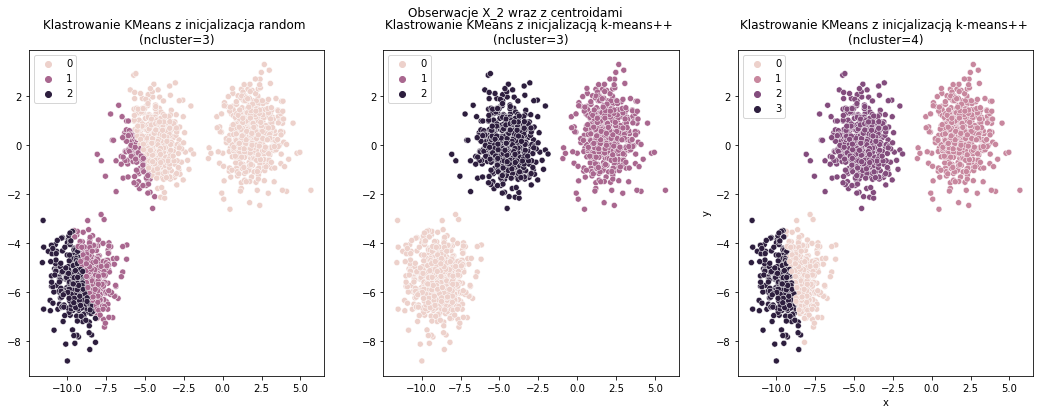

Data frame shape: (1500, 2)


-----------[KMEANS_RANDOM]-----------
Duration: 0:00:00.002994
Silhouette coeffcient: 0.3490213397936618
Calinski-Harabasz coeffcient: 1842.6378071189322
Davies-Bouldin index: 1.0000636224579476


-----------[KMEANS++(3)]-----------
Duration: 0:00:00.014993
Silhouette coeffcient: 0.7333423486262539
Calinski-Harabasz coeffcient: 10633.868943793219
Davies-Bouldin index: 0.3645102673195062


-----------[KMEANS++(4)]-----------
Duration: 0:00:00.024992
Silhouette coeffcient: 0.5853530244304029
Calinski-Harabasz coeffcient: 8089.376315003494
Davies-Bouldin index: 0.8003205978526378




In [41]:
np.random.seed(100)
algorithms = ['KMEANS_RANDOM', 'KMEANS++(3)', 'KMEANS++(4)']
eval_times = []
silh_distances = []
calinski_distances = []
db_distances = []
shape_X = X_2.shape

# K-means random, ncluster=3
tic = dt.datetime.now()
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_2)
eval_times.append(dt.datetime.now() - tic)

y_cluster_random = model_random.predict(X_2)
silh_dist = silhouette_score(X_2, y_cluster_random, metric='euclidean')
silh_distances.append(silh_dist)
cali_dist = calinski_harabasz_score(X_2, y_cluster_random)
calinski_distances.append(cali_dist)
db_dist = davies_bouldin_score(X_2, y_cluster_random)
db_distances.append(db_dist)

# K-means++, ncluster=3
tic = dt.datetime.now()
model_plusplus = KMeans(n_clusters=3, init='k-means++')
model_plusplus.fit(X_2)
eval_times.append(dt.datetime.now() - tic)

y_cluster_plusplus = model_plusplus.predict(X_2)
silh_dist = silhouette_score(X_2, y_cluster_plusplus, metric='euclidean')
silh_distances.append(silh_dist)
cali_dist = calinski_harabasz_score(X_2, y_cluster_plusplus)
calinski_distances.append(cali_dist)
db_dist = davies_bouldin_score(X_2, y_cluster_plusplus)
db_distances.append(db_dist)

# K-means++, ncluster=4
tic = dt.datetime.now()
model_plusplus4 = KMeans(n_clusters=4, init='k-means++')
model_plusplus4.fit(X_2)
eval_times.append(dt.datetime.now() - tic)

y_cluster_plusplus4 = model_plusplus4.predict(X_2)
silh_dist = silhouette_score(X_2, y_cluster_plusplus4, metric='euclidean')
silh_distances.append(silh_dist)
cali_dist = calinski_harabasz_score(X_2, y_cluster_plusplus4)
calinski_distances.append(cali_dist)
db_dist = davies_bouldin_score(X_2, y_cluster_plusplus4)
db_distances.append(db_dist)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y_cluster_plusplus, ax=ax[1])
sns.scatterplot(x=X_2[:, 0], y=X_2[:, 1], hue=y_cluster_plusplus4, ax=ax[2])
ax[0].set_title('Klastrowanie KMeans z inicjalizacja random \n(ncluster=3)')
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++ \n(ncluster=3)')
ax[2].set_title('Klastrowanie KMeans z inicjalizacją k-means++ \n(ncluster=4)')
plt.suptitle('Obserwacje X_2 wraz z centroidami')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Czas kalkulacji / Silhouette score / Calinski-Harabasz score / Davies-Boulding index
print(f'Data frame shape: {shape_X}')
print('\n')
for algorithm, etime, silh, cali, db  in zip(algorithms, eval_times, silh_distances, calinski_distances, db_distances):
    print(f'-----------[{algorithm}]-----------') 
    print(f'Duration: {etime}')
    print(f'Silhouette coeffcient: {silh}')
    print(f'Calinski-Harabasz coeffcient: {cali}')
    print(f'Davies-Bouldin index: {db}')
    print('\n')

## Przykład 2

Niestety nie zawsze powyższe metryki się sprawdzają. W poniższym przykładzie porównujemy między sobą 3 kklastrowania: _KMeans++_, _Spectral Clustering_ oraz _DBSCAN_. Każda z tych metod dzieli obserwacje w innym sposób. Wydaję się, że najgorzej robi to metoda _KMeans++_, natomiast Spectral Clustering oraz _DBSCAN_ działają podobnie, choć _DBSCAN_ wskazuję nam jeszcze pewne anomalie w naszych danych. Jeśli jednak spojrzymy na wyniki tych metryk to okazuję się, że żadna z trzech metryk nie odpowie nam na pytanie, które z tych klastrowań jest poprawne. W tego typu problemach, gdzie klastry nie charakteryzują się rozkładem normalnym metryka każda z tych metryk nie do końca zda egzamin.  

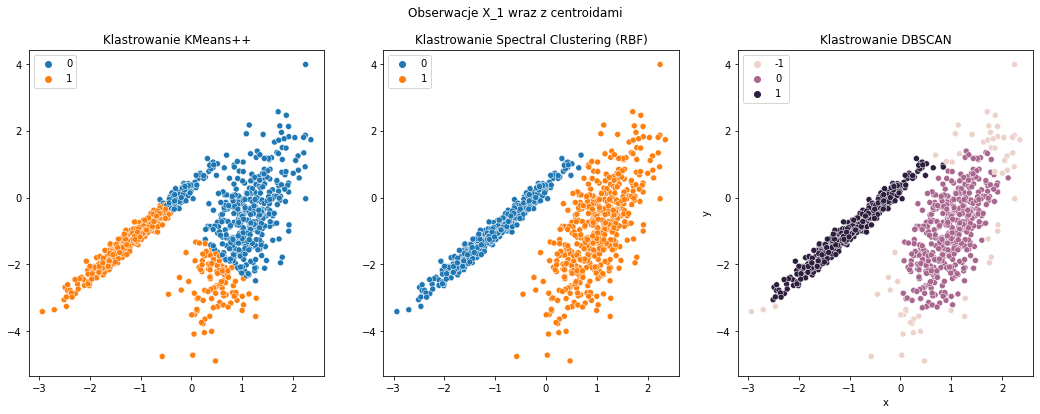

Data frame shape: (1000, 2)


-----------[KMEANS++]-----------
Duration: 0:00:00.019017
Silhouette coeffcient: 0.4270730877908618
Calinski-Harabasz coeffcient: 886.9661372979564
Davies-Bouldin index: 0.9324389060600777


-----------[SPECTRAL_RBF]-----------
Duration: 0:00:00.168001
Silhouette coeffcient: 0.42967355323274
Calinski-Harabasz coeffcient: 658.0643390191713
Davies-Bouldin index: 0.9970552748687121


-----------[DBSCAN]-----------
Duration: 0:00:00.005002
Silhouette coeffcient: 0.4157241178607081
Calinski-Harabasz coeffcient: 310.90990033808214
Davies-Bouldin index: 10.006292286691144




In [42]:
np.random.seed(100)
algorithms = ['KMEANS++', 'SPECTRAL_RBF', 'DBSCAN']
eval_times = []
silh_distances = []
calinski_distances = []
db_distances = []
shape_X = X_1.shape

# KMeans++
tic = dt.datetime.now()
model_kmeans = KMeans(n_clusters=2, init='k-means++')
model_kmeans.fit(X_1)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_plus_plus = model_kmeans.labels_
silh_dist = silhouette_score(X_1, y_cluster_plus_plus, metric='euclidean')
silh_distances.append(silh_dist)
cali_dist = calinski_harabasz_score(X_1, y_cluster_plus_plus)
calinski_distances.append(cali_dist)
db_dist = davies_bouldin_score(X_1, y_cluster_plus_plus)
db_distances.append(db_dist)

# Spectral Clustering (RBF)
tic = dt.datetime.now()
model_sc = SpectralClustering(n_clusters=2, gamma=10.0, affinity='rbf', assign_labels='kmeans')
model_sc.fit(X_1)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_spectral_rbf = model_sc.labels_
silh_dist = silhouette_score(X_1, y_cluster_spectral_rbf, metric='euclidean')
silh_distances.append(silh_dist)
cali_dist = calinski_harabasz_score(X_1, y_cluster_spectral_rbf)
calinski_distances.append(cali_dist)
db_dist = davies_bouldin_score(X_1, y_cluster_spectral_rbf)
db_distances.append(db_dist)

# Algorytm DBSCAN
tic = dt.datetime.now()
model_dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
model_dbscan.fit(X_1)  
eval_times.append(dt.datetime.now() - tic)

y_cluster_dbscan = model_dbscan.labels_
silh_dist = silhouette_score(X_1, y_cluster_dbscan, metric='euclidean')
silh_distances.append(silh_dist)
cali_dist = calinski_harabasz_score(X_1, y_cluster_dbscan)
calinski_distances.append(cali_dist)
db_dist = davies_bouldin_score(X_1, y_cluster_dbscan)
db_distances.append(db_dist)

# Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_plus_plus, ax=ax[0])
sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_spectral_rbf, ax=ax[1])
sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1], hue=y_cluster_dbscan, ax=ax[2])
ax[0].set_title('Klastrowanie KMeans++')
ax[1].set_title('Klastrowanie Spectral Clustering (RBF)')
ax[2].set_title('Klastrowanie DBSCAN')
plt.suptitle('Obserwacje X_1 wraz z centroidami')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Czas kalkulacji / Silhouette score / Calinski-Harabasz score / Davies-Boulding index
print(f'Data frame shape: {shape_X}')
print('\n')
for algorithm, etime, silh, cali, db  in zip(algorithms, eval_times, silh_distances, calinski_distances, db_distances):
    print(f'-----------[{algorithm}]-----------') 
    print(f'Duration: {etime}')
    print(f'Silhouette coeffcient: {silh}')
    print(f'Calinski-Harabasz coeffcient: {cali}')
    print(f'Davies-Bouldin index: {db}')
    print('\n')

W zależności od problemu do identyfikacji czy nasze klastry są dobrane poprawnie można wykorzystać uczenie maszynowe. W powyższym przykładzie wydaję się zastosowanie regresji liniowej dla zmiennej $x$ względem zmiennej celu $y$ pozwoliło by sprawdzić jak podstawowy model wyjaśni nam takie dane. Jeśli model działajacy na klastrach działa lepiej niż dla wszystkich obserwacji to można przypuszczać, że nasze klastrowanie jest dobre. Porównując się do róznych metod kalstrowanie można wtedy badać błędy MAE, RMSE czy R2.